In [1]:
from glob import glob
import sys
import getpass
import os
# import psutil
from os.path import join, exists
from os.path import getsize
import pickle
import numpy as np
import pandas as pd
import scipy

from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.stats.multitest
# from statsmodels.sandbox.stats.multicomp import multipletests

# import nilearn.masking
from nilearn import plotting as nplt
from nilearn import image as niimg
import nilearn.decoding

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
# from sklearn.svm import LinearSVC

# import mydef as my Class correction for projects
import mydef

/home/sungbeenpark/anaconda3/envs/sampark/lib/python3.9/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
GA = mydef.GA()

OS : linux
Google Drive is detected!
Git directory is detected!


---

In [3]:
dir_data = join(GA.dir_work,'tsmean/bp04')

dir_root = '/home/sungbeenpark/'
dir_work = join(dir_root, 'GA')

In [4]:
rois = []
for s in glob(join(dir_data, '*')):
    rois.append(s.split('/')[-1])
rois = sorted(rois)
rois

['Core_PCC_l',
 'Core_PCC_r',
 'Core_aMPFC_l',
 'Core_aMPFC_r',
 'MTLsub_HF_l',
 'MTLsub_HF_r',
 'MTLsub_PHC_l',
 'MTLsub_PHC_r',
 'MTLsub_Rsp_l',
 'MTLsub_Rsp_r',
 'MTLsub_pIPL_l',
 'MTLsub_pIPL_r',
 'MTLsub_vMPFC',
 'dMsub_LTC_l',
 'dMsub_LTC_r',
 'dMsub_TPJ_l',
 'dMsub_TPJ_r',
 'dMsub_TempP_l_temp',
 'dMsub_TempP_r_temp',
 'dMsub_dMPFC',
 'fan105',
 'fan106',
 'fan189',
 'fan190',
 'fan193',
 'fan194',
 'fan196',
 'fan199',
 'fan200',
 'fan203',
 'fan204',
 'fan205',
 'fan206',
 'fan209',
 'n200_c1_L_Postcentral',
 'n200_c2_R_CerebellumIV-V',
 'n200_c3_R_Postcentral',
 'n200_c4_L_Putamen',
 'n200_c5_R_SMA',
 'n200_c6_R_CerebellumVIIIb',
 'n200_c7_L_Thalamus']

---

In [5]:
temp = GA.show_pkl_list(path=dir_work , word="corr")
# temp = GA.show_pkl_list(path=dir_stats , word="corr")
temp

,file,name,identity
0,/home/sungbeenpark/GA/20211027.df.functional_c...,20211027.df.functional_correlation.DMN-visual-...,a


In [6]:
idx = 0

print(list(temp.name)[idx])

with open(list(temp.file)[idx], 'rb') as fr:
    GA.df_functional_correlation = pickle.load(fr)
GA.df_functional_correlation

20211027.df.functional_correlation.DMN-visual-localizer.bp02.pkl


,subj,stage,run,roiA,roiB,Pearson_r,pval
0,01,early_practice,r01,Core_PCC_l,Core_PCC_r,0.910773,0.000000e+00
1,01,early_practice,r01,Core_PCC_l,Core_aMPFC_l,0.646211,1.418624e-130
2,01,early_practice,r01,Core_PCC_l,Core_aMPFC_r,0.530222,1.748574e-80
3,01,early_practice,r01,Core_PCC_l,MTLsub_HF_l,0.458608,4.213810e-58
4,01,early_practice,r01,Core_PCC_l,MTLsub_HF_r,0.423351,6.824930e-49
...,...,...,...,...,...,...,...
147595,23,late_unpractice,r03,n200_c4_L_Putamen,n200_c6_R_CerebellumVIIIb,0.782257,4.217198e-227
147596,23,late_unpractice,r03,n200_c4_L_Putamen,n200_c7_L_Thalamus,0.840508,1.891310e-293
147597,23,late_unpractice,r03,n200_c5_R_SMA,n200_c6_R_CerebellumVIIIb,0.523176,4.883381e-78
147598,23,late_unpractice,r03,n200_c5_R_SMA,n200_c7_L_Thalamus,0.826372,4.232595e-275


# Plot tsmean

In [36]:
subj = np.random.choice(GA.list_subj[:15], replace=True)
stage = np.random.choice(GA.list_stage, replace=True)

gg = 'GA' if 'early' in stage else ('GB' if 'late' in stage else 'invalid')

runs = ['r%02d'%(i+1) for i in range(6)]
run = np.random.choice(runs, replace=True)

roia = np.random.choice(rois, replace=True)
roib = np.random.choice(rois, replace=True)

print(subj,stage,run,roia,roib)

01 early_practice r03 MTLsub_PHC_l n200_c6_R_CerebellumVIIIb


In [37]:
GA.df_functional_correlation[
    (GA.df_functional_correlation.subj == subj) &
    (GA.df_functional_correlation.stage == stage) &
    (GA.df_functional_correlation.run == run) &
    (GA.df_functional_correlation.roiA == roia) &
    (GA.df_functional_correlation.roiB == roib)
].Pearson_r

1897    0.834127
Name: Pearson_r, dtype: float64

Text(0.5, 1.0, 'r=0.8341 (p=5.948e-285)')

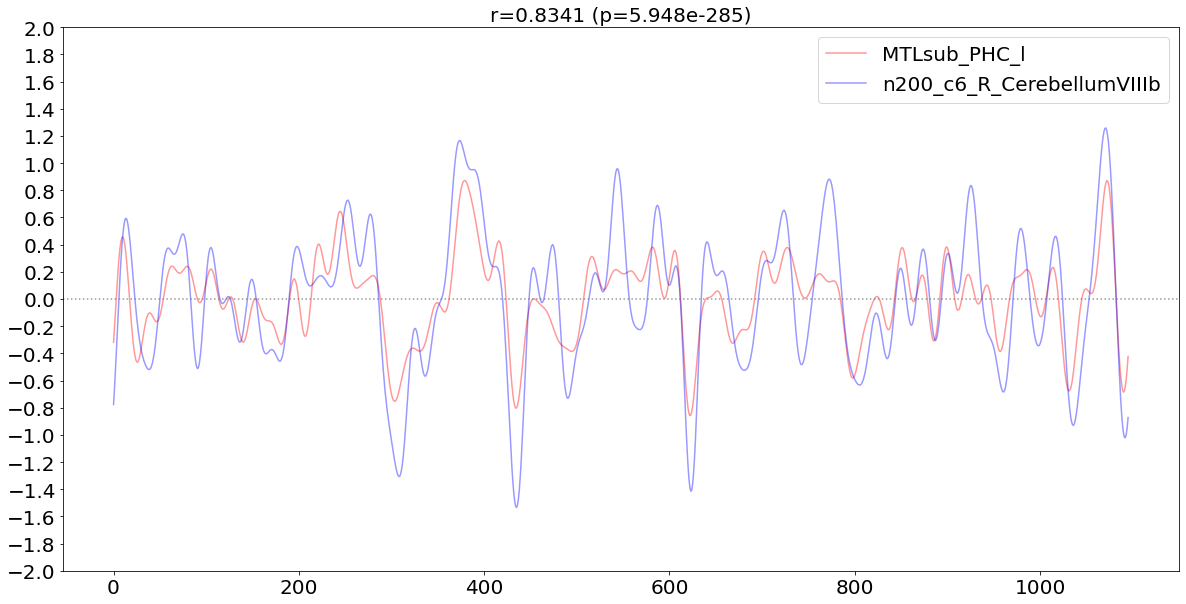

In [38]:
a = GA.load_tsmean_1D(
    join(dir_data,roia,'tsmean.bp.pb04.%s.%s.%s.1D'%(gg+subj,run,roia))
)
b = GA.load_tsmean_1D(
    join(dir_data,roib,'tsmean.bp.pb04.%s.%s.%s.1D'%(gg+subj,run,roib))
)

nrow = 1

fig, axs = plt.subplots(nrows=nrow, ncols=1, figsize=(20,nrow*10))

xrange = a.shape[0]

## raw plot
ax = axs if nrow==1 else axs[0]
ax.plot(np.arange(xrange), a, 'r-', label=roia, alpha=0.4)
ax.plot(np.arange(xrange), b, 'b-', label=roib, alpha=0.4)

ax.set(xticks=range(0,xrange,200), yticks=np.arange(-2.,2.+1e-4,0.2))
ax.tick_params(axis="both", labelsize=20)
ax.legend(fontsize=20, loc='best')
ax.axhline(y=0, color='gray', linestyle=':', alpha=0.8)
ax.set_title('r=%.4f (p=%.3e)' % (*scipy.stats.pearsonr(x=a, y=b),), fontsize=20)

In [ ]:
# ## preprocessed(partial correlation) plot
# z = whole_brain / np.linalg.norm(whole_brain)
# M = np.outer(z, z)
# a_prep = a - np.matmul(M,a)
# b_prep = b - np.matmul(M,b)

---

In [11]:
# list_ = []
# for stage in GA.list_stage:
#     runs = ['r01', 'r02', 'r03'] if 'practice' in stage else (['r04', 'r05', 'r06'] if 'unpractice' in stage else 'invalid')
#     for subj in GA.list_subj[:15]:
#         for run in runs:
#             for i, a in enumerate(rois):
#                 for b in rois[i+1:]:
#                     list_.append([stage, subj, run, a, b])
# list_ = np.array(list_)
# list_.shape

(147600, 5)

In [12]:
# lines = []
# # previous = {}
# # previous['stage'] = ''
# # previous['subj'] = ''
# # previous['run'] = ''
# for stage, subj, run, roia, roib in tqdm(list_):
#     gg = 'GA' if 'early' in stage else ('GB' if 'late' in stage else 'invalid')
    
# #     if previous['stage']!=stage or previous['subj']!=subj or previous['run']!=run:
# #         whole_brain = GA.load_tsmean_1D(
# #             join(dir_tsmean,'full_mask','tsmean.bp_demean.errts.%s.%s.%s.full_mask.1D'%(stat[-2:],gg+subj,run))
# #         )
# #         z = whole_brain / np.linalg.norm(whole_brain)
# #         M = np.outer(z, z)

#     a = GA.load_tsmean_1D(
#         join(dir_data,roia,'tsmean.bp.pb04.%s.%s.%s.1D'%(gg+subj,run,roia))
#     )
#     b = GA.load_tsmean_1D(
#         join(dir_data,roib,'tsmean.bp.pb04.%s.%s.%s.1D'%(gg+subj,run,roib))
#     )
# #     ## partial correlation
# #     a_prep = a - np.matmul(M, a)
# #     b_prep = b - np.matmul(M, b)
    
# #     r, p = scipy.stats.pearsonr(x=a_prep, y=b_prep)
#     r, p = scipy.stats.pearsonr(x=a, y=b)
#     lines.append([subj, stage, run, roia, roib, r, p])
    
# #     ## renew
# #     previous['stage'] = stage
# #     previous['subj'] = subj
# #     previous['run'] = run

# GA.df_functional_correlation = pd.DataFrame(lines, columns=GA.df_functional_correlation.columns)

100%|██████████| 147600/147600 [1:58:31<00:00, 20.75it/s]   


In [15]:
# GA.save_as_pkl(data=GA.df_functional_correlation, path=dir_work, suffix="df.functional_correlation.DMN-visual-localizer.bp02")

---

In [20]:
sorted_rois = sorted(set(list(GA.df_functional_correlation.roiA.unique())+list(GA.df_functional_correlation.roiB.unique())))
print(len(sorted_rois), sorted_rois)

41 ['Core_PCC_l', 'Core_PCC_r', 'Core_aMPFC_l', 'Core_aMPFC_r', 'MTLsub_HF_l', 'MTLsub_HF_r', 'MTLsub_PHC_l', 'MTLsub_PHC_r', 'MTLsub_Rsp_l', 'MTLsub_Rsp_r', 'MTLsub_pIPL_l', 'MTLsub_pIPL_r', 'MTLsub_vMPFC', 'dMsub_LTC_l', 'dMsub_LTC_r', 'dMsub_TPJ_l', 'dMsub_TPJ_r', 'dMsub_TempP_l_temp', 'dMsub_TempP_r_temp', 'dMsub_dMPFC', 'fan105', 'fan106', 'fan189', 'fan190', 'fan193', 'fan194', 'fan196', 'fan199', 'fan200', 'fan203', 'fan204', 'fan205', 'fan206', 'fan209', 'n200_c1_L_Postcentral', 'n200_c2_R_CerebellumIV-V', 'n200_c3_R_Postcentral', 'n200_c4_L_Putamen', 'n200_c5_R_SMA', 'n200_c6_R_CerebellumVIIIb', 'n200_c7_L_Thalamus']


In [22]:
rois_ = {}

rois_['Core'] = sorted_rois[:4]
rois_['MTLsub'] = sorted_rois[4:13]
rois_['dMsub'] = sorted_rois[13:20]
# rois_['DMN'] = sorted_rois[:20]
# rois_['task-negative'] = sorted_rois[:20]
rois_['Yeo1'] = sorted_rois[20:34]
rois_['localizer'] = sorted_rois[34:]
# rois_['task-positive'] = sorted_rois[20:]

rois_

{'Core': ['Core_PCC_l', 'Core_PCC_r', 'Core_aMPFC_l', 'Core_aMPFC_r'],
 'MTLsub': ['MTLsub_HF_l',
  'MTLsub_HF_r',
  'MTLsub_PHC_l',
  'MTLsub_PHC_r',
  'MTLsub_Rsp_l',
  'MTLsub_Rsp_r',
  'MTLsub_pIPL_l',
  'MTLsub_pIPL_r',
  'MTLsub_vMPFC'],
 'dMsub': ['dMsub_LTC_l',
  'dMsub_LTC_r',
  'dMsub_TPJ_l',
  'dMsub_TPJ_r',
  'dMsub_TempP_l_temp',
  'dMsub_TempP_r_temp',
  'dMsub_dMPFC'],
 'Yeo1': ['fan105',
  'fan106',
  'fan189',
  'fan190',
  'fan193',
  'fan194',
  'fan196',
  'fan199',
  'fan200',
  'fan203',
  'fan204',
  'fan205',
  'fan206',
  'fan209'],
 'localizer': ['n200_c1_L_Postcentral',
  'n200_c2_R_CerebellumIV-V',
  'n200_c3_R_Postcentral',
  'n200_c4_L_Putamen',
  'n200_c5_R_SMA',
  'n200_c6_R_CerebellumVIIIb',
  'n200_c7_L_Thalamus']}

In [23]:
## A array representing group types
group = []
cnt = 1
for _, value in rois_.items():
    temp = np.ones(len(value)) * cnt
    group.append(temp)
    cnt += 1
group = np.concatenate(group).astype(int)
group

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5])

In [24]:
def comb_group(group):
    list_ = np.unique(group).astype(int)

    res = []
    for i, g1 in enumerate(list_):
        for g2 in list_[:i+1]:
            res.append(sorted([g1, g2]))
    return res

comb_group(group)

[[1, 1],
 [1, 2],
 [2, 2],
 [1, 3],
 [2, 3],
 [3, 3],
 [1, 4],
 [2, 4],
 [3, 4],
 [4, 4],
 [1, 5],
 [2, 5],
 [3, 5],
 [4, 5],
 [5, 5]]

## 3. Calculating Interaction Strength through Quick & Dirty Method

In [39]:
## The module 'GA.make_df_correlation_matrix' is work?
subj = '01'
stage = 'early_practice'

print(subj, stage)
GA.make_df_correlation_matrix(subj, stage, group=group)

01 early_practice


,Core_PCC_l,Core_PCC_r,Core_aMPFC_l,Core_aMPFC_r,MTLsub_HF_l,MTLsub_HF_r,MTLsub_PHC_l,MTLsub_PHC_r,MTLsub_Rsp_l,MTLsub_Rsp_r,...,fan205,fan206,fan209,n200_c1_L_Postcentral,n200_c2_R_CerebellumIV-V,n200_c3_R_Postcentral,n200_c4_L_Putamen,n200_c5_R_SMA,n200_c6_R_CerebellumVIIIb,n200_c7_L_Thalamus
Core_PCC_l,1.000000,0.911754,0.744737,0.633460,0.642217,0.634755,0.682792,0.705816,0.781328,0.738372,...,0.546621,0.577897,0.557045,0.430032,0.445066,0.420735,0.518211,0.474266,0.500692,0.488548
Core_PCC_r,0.911754,1.000000,0.749418,0.646550,0.655048,0.632276,0.653327,0.769755,0.772088,0.805609,...,0.555675,0.583152,0.592403,0.414000,0.439027,0.422801,0.534000,0.480532,0.484570,0.508602
Core_aMPFC_l,0.744737,0.749418,1.000000,0.877934,0.639288,0.528567,0.599008,0.645251,0.573522,0.562636,...,0.517548,0.485506,0.472480,0.330659,0.245222,0.311520,0.454153,0.385568,0.321068,0.424383
Core_aMPFC_r,0.633460,0.646550,0.877934,1.000000,0.601782,0.513701,0.646908,0.614482,0.519299,0.464155,...,0.540293,0.444804,0.517321,0.389530,0.304538,0.418513,0.529406,0.473068,0.300778,0.553095
MTLsub_HF_l,0.642217,0.655048,0.639288,0.601782,1.000000,0.629223,0.683609,0.715348,0.647518,0.598254,...,0.616280,0.636044,0.630148,0.486430,0.457355,0.518879,0.610486,0.576264,0.523639,0.608052
MTLsub_HF_r,0.634755,0.632276,0.528567,0.513701,0.629223,1.000000,0.694580,0.713897,0.728424,0.696840,...,0.617998,0.616100,0.643611,0.526819,0.602044,0.663180,0.680107,0.632720,0.640630,0.603205
MTLsub_PHC_l,0.682792,0.653327,0.599008,0.646908,0.683609,0.694580,1.000000,0.826224,0.753838,0.652691,...,0.639028,0.523472,0.674638,0.480983,0.551327,0.583330,0.624518,0.589784,0.563171,0.631819
MTLsub_PHC_r,0.705816,0.769755,0.645251,0.614482,0.715348,0.713897,0.826224,1.000000,0.794280,0.822687,...,0.655918,0.622051,0.677574,0.508860,0.581865,0.592830,0.662609,0.612874,0.602192,0.631311
MTLsub_Rsp_l,0.781328,0.772088,0.573522,0.519299,0.647518,0.728424,0.753838,0.794280,1.000000,0.864636,...,0.574473,0.664801,0.634524,0.424230,0.512614,0.507223,0.579658,0.519987,0.581855,0.578760
MTLsub_Rsp_r,0.738372,0.805609,0.562636,0.464155,0.598254,0.696840,0.652691,0.822687,0.864636,1.000000,...,0.610946,0.651032,0.636588,0.462654,0.544624,0.532442,0.593607,0.536679,0.620537,0.542957


In [25]:
subjs = GA.df_functional_correlation.subj.unique()
subjs

array(['01', '02', '05', '07', '08', '11', '12', '13', '14', '15', '18',
       '19', '20', '21', '23'], dtype=object)

In [26]:
## Initializing a result variable
res = {}
for [g1,g2] in comb_group(group):
    res[(g1,g2)] = []

tmp = {}
## Main calculation
for subj in tqdm(subjs):
    corrmat = {}
    I = {}

    ## Matrix implementation & initializing an interaction variable
    for stage in ['early_practice', 'late_practice']:
        corrmat[stage] = GA.make_df_correlation_matrix(subj, stage, group=group)
        for [g1,g2] in comb_group(group):
            I[stage, (g1,g2)] = []
    ## Inserting elements of the matrix one by one
    for stage in ['early_practice', 'late_practice']:
        for a, roiA in enumerate(sorted_rois):
            for b, roiB in enumerate(sorted_rois):
                [g1,g2] = sorted([group[a], group[b]])
                element = corrmat[stage].loc[roiA][roiB]
                I[stage, (g1,g2)].append(element)

    ## Normalizing interaction strength
    Ip = {}
    for [g1,g2] in comb_group(group):
        for stage in ['early_practice', 'late_practice']:
            if g1==g2:
                Ip[stage,(g1,g2)] = np.mean(I[stage,(g1,g2)])
            else:
                Ip[stage,(g1,g2)] = np.mean(I[stage,(g1,g2)])/np.sqrt(np.mean(I[stage,(g1,g1)])*np.mean(I[stage,(g2,g2)]))
            tmp[(subj,stage,g1,g2)] = Ip[stage,(g1,g2)]
        res[(g1,g2)].append(Ip['late_practice',(g1,g2)] - Ip['early_practice',(g1,g2)])

100%|██████████| 15/15 [00:11<00:00,  1.30it/s]


## 4. Correlation between the change in the visual-DMN core integration and improvement in success rate

In [27]:
def convert_key_into_regions(rois, key):
    (g1,g2) = key
    a, b = list(rois.keys())[g1-1], list(rois.keys())[g2-1]
    return a, b

In [28]:
def plot_interaction(X, Y, key, ax):
    ax = sns.regplot(x=X, y=Y, ci=GA.sig1*100, truncate=False, ax=ax)
    a, b = convert_key_into_regions(rois=rois_, key=key)
    ax.set_ylabel('Reward GB-GA')
    ax.set_xlabel('%s_%s GB-GA'%(a,b))
    ax.set_title('r=%.4f (p=%.3f)' % (*scipy.stats.pearsonr(x=X, y=Y),))
    ax.set_xlim(-0.6, 0.6)
    ax.set_ylim(-0., 0.8)
    ax.axvline(x=0, color='k', linestyle='--', alpha=0.25)

In [29]:
df = pd.DataFrame(columns=['subj', 'stage', 'groupA', 'groupB', 'int_str'])
for i, ((subj, stage, a, b), val) in enumerate(tmp.items()):
    df.loc[i,'subj'] = subj
    df.loc[i,'stage'] = stage
    df.loc[i,'groupA'] = a
    df.loc[i,'groupB'] = b
    df.loc[i,'int_str'] = val
df

,subj,stage,groupA,groupB,int_str
0,01,early_practice,1,1,0.820481
1,01,late_practice,1,1,0.730117
2,01,early_practice,1,2,0.861225
3,01,late_practice,1,2,0.817722
4,01,early_practice,2,2,0.650291
...,...,...,...,...,...
445,23,late_practice,3,5,0.857847
446,23,early_practice,4,5,0.895176
447,23,late_practice,4,5,0.854686
448,23,early_practice,5,5,0.791469


[(1, 1), (2, 2), (3, 3), (4, 4), (5, 5)]


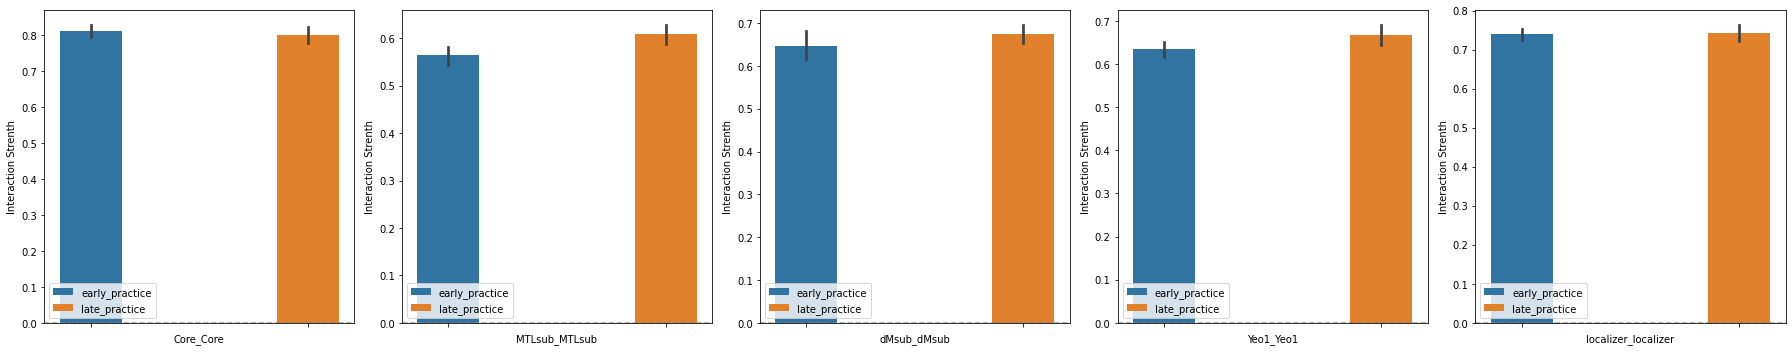

In [30]:
tmp = []
for g1, g2 in res.keys():
    if g1==g2:
        tmp.append((g1,g2))
print(tmp)
ncol=len(tmp)

fig, axs = plt.subplots(nrows=1, ncols=ncol, figsize=(ncol*5,5))
for i, (a, b) in enumerate(tmp):
    ax = axs[i] if ncol > 1 else axs
    ax = sns.barplot(x='stage', y='int_str', hue='stage'
                     , data=df[(df.groupA==a) & (df.groupB==b)]
                     , ax=ax, ci=GA.sig1*100)
    p, q = convert_key_into_regions(rois_, (a,b))
    ax.set(xlabel="%s_%s"%(p,q), ylabel="Interaction Strenth", xticks=(-0.2, 1.2))
    ax.axhline(y=0, color='gray', linestyle='--', alpha=.8)
    ax.legend(loc='best')
fig.tight_layout() 

[(1, 2), (1, 3), (2, 3), (1, 4), (2, 4), (3, 4), (1, 5), (2, 5), (3, 5), (4, 5)]


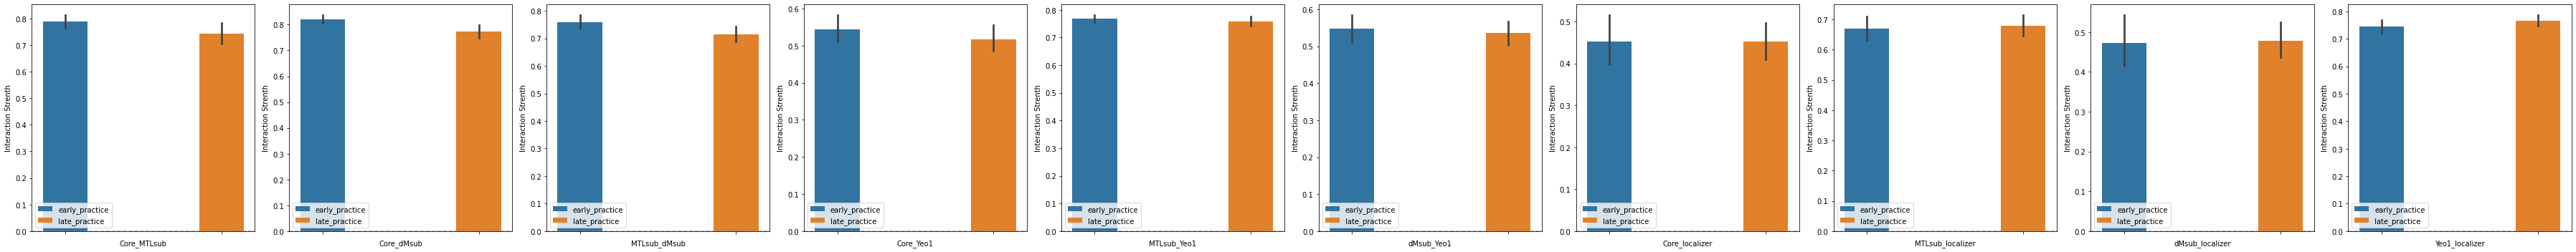

In [31]:
tmp = []
for g1, g2 in res.keys():
    if g1!=g2:
        tmp.append((g1,g2))
print(tmp)
ncol=len(tmp)

fig, axs = plt.subplots(nrows=1, ncols=ncol, figsize=(ncol*5,5))
for i, (a, b) in enumerate(tmp):
    ax = axs[i] if ncol > 1 else axs
    ax = sns.barplot(x='stage', y='int_str', hue='stage'
                     , data=df[(df.groupA==a) & (df.groupB==b)]
                     , ax=ax, ci=GA.sig1*100)
    p, q = convert_key_into_regions(rois_, (a,b))
    ax.set(xlabel="%s_%s"%(p,q), ylabel="Interaction Strenth", xticks=(-0.2, 1.2))
    ax.axhline(y=0, color='gray', linestyle='--', alpha=.8)
    ax.legend(loc='best')
fig.tight_layout() 

[(1, 1), (2, 2), (3, 3), (4, 4), (5, 5)]


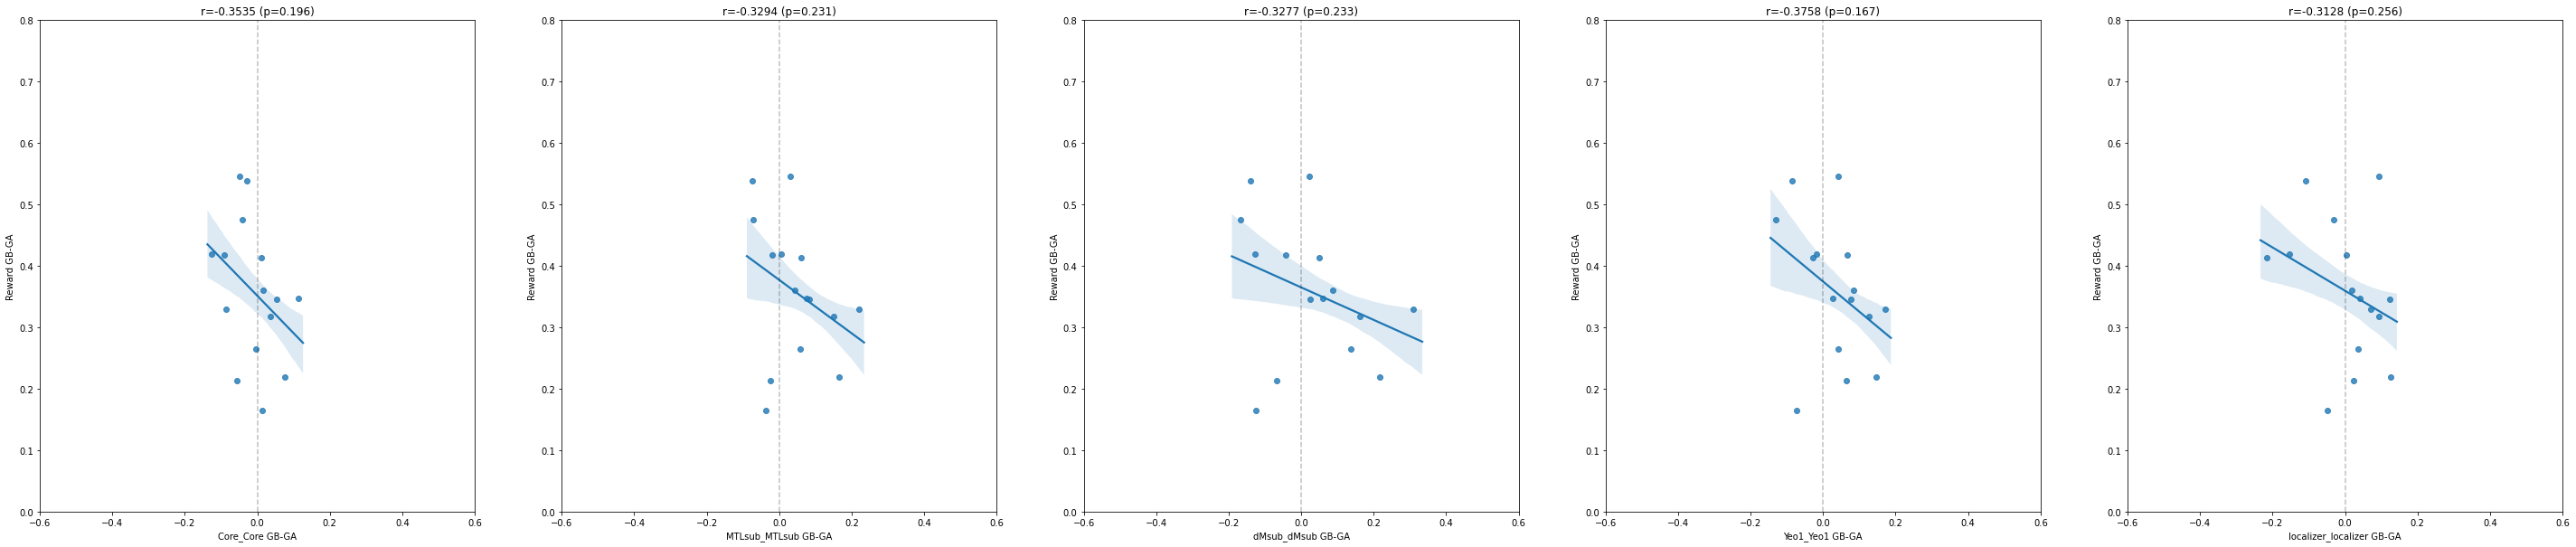

In [33]:
Y = GA.del_RewardRate[:15]

tmp = []
for g1, g2 in res.keys():
    if g1==g2:
        tmp.append((g1,g2))
print(tmp)
ncol=len(tmp)
fig, axs = plt.subplots(nrows=1, ncols=ncol, figsize=(10*ncol,10))
for i, (g1, g2) in enumerate(tmp):
    key = (g1,g2)
    X = res[key]
    ax = axs[i] if ncol > 1 else axs
    plot_interaction(X, Y, key=key, ax=ax)

# fig.savefig(fname=join(GA.dir_git, 'GA/images/%s.DMN_Yeo17_Localizer.png'%GA.today))

[(1, 2), (1, 3), (2, 3), (1, 4), (2, 4), (3, 4), (1, 5), (2, 5), (3, 5), (4, 5)]


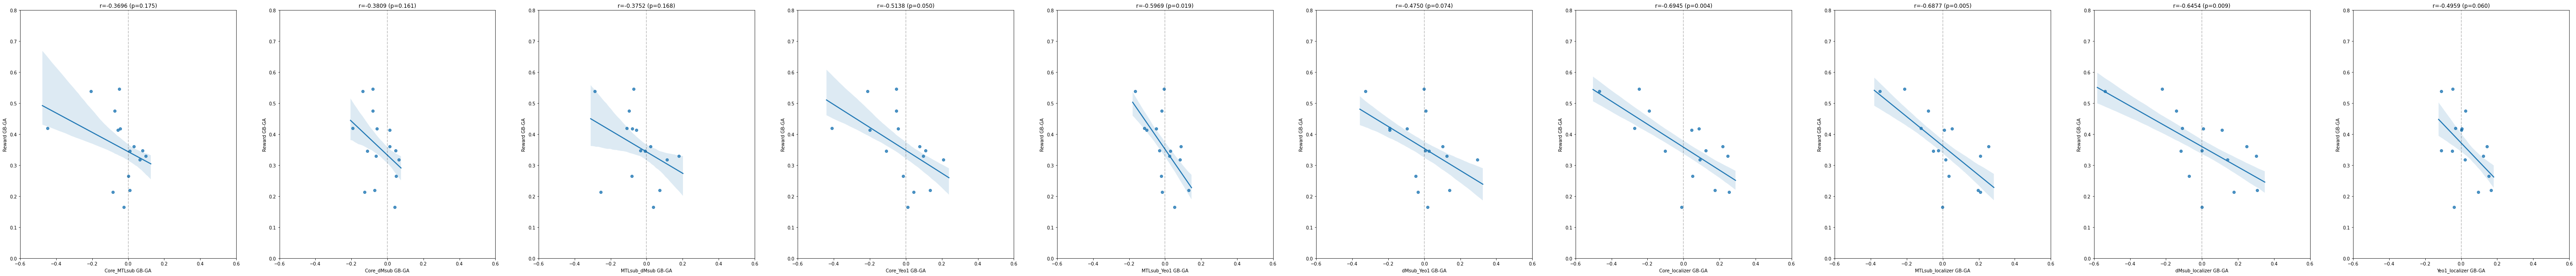

In [34]:
Y = GA.del_RewardRate[:15]

tmp = []
for g1, g2 in res.keys():
    if g1!=g2:
        tmp.append((g1,g2))
print(tmp)
ncol=len(tmp)
fig, axs = plt.subplots(nrows=1, ncols=ncol, figsize=(10*ncol,10))
for i, (g1, g2) in enumerate(tmp):
    key = (g1,g2)
    X = res[key]
    ax = axs[i] if ncol > 1 else axs
    plot_interaction(X, Y, key=key, ax=ax)

# fig.savefig(fname=join(GA.dir_git, 'GA/images/%s.DMN_Yeo17_Localizer.png'%GA.today))

In [40]:
## Lower-Tailed t-Test
for key, X in res.items():
    a, b = convert_key_into_regions(rois=rois_, key=key)
    print('%s_%s: '%(a,b), scipy.stats.ttest_1samp(X, popmean=0, alternative='less'))

Core_MTLsub:  Ttest_1sampResult(statistic=-0.5031853648069866, pvalue=0.3093172843455292)
Core_dMsub:  Ttest_1sampResult(statistic=-1.8389392866110417, pvalue=0.038092374218060124)
MTLsub_dMsub:  Ttest_1sampResult(statistic=-1.5232393283880237, pvalue=0.06926517586661736)
Core_Yeo1:  Ttest_1sampResult(statistic=-1.6866634022973457, pvalue=0.05119920802059884)
MTLsub_Yeo1:  Ttest_1sampResult(statistic=-0.10394801983195168, pvalue=0.45896308286073284)
dMsub_Yeo1:  Ttest_1sampResult(statistic=-0.7376055971236735, pvalue=0.23334046662847846)
Core_localizer:  Ttest_1sampResult(statistic=1.643233870519712, pvalue=0.9444326135197341)
MTLsub_localizer:  Ttest_1sampResult(statistic=1.7817133345909144, pvalue=0.9573640317994856)
dMsub_localizer:  Ttest_1sampResult(statistic=0.774397278212658, pvalue=0.7775179945229775)
Yeo1_localizer:  Ttest_1sampResult(statistic=2.6080197535951757, pvalue=0.9928784567007052)


In [41]:
## Spearman correlation
for key, X in res.items():
    a, b = convert_key_into_regions(rois=rois_, key=key)
    print('%s_%s: '%(a,b), scipy.stats.spearmanr(X,Y))

Core_MTLsub:  SpearmanrResult(correlation=-0.1657397107897664, pvalue=0.3814126631130643)
Core_dMsub:  SpearmanrResult(correlation=0.020244716351501667, pvalue=0.9154364690235781)
MTLsub_dMsub:  SpearmanrResult(correlation=-0.2978865406006674, pvalue=0.10986475097952342)
Core_Yeo1:  SpearmanrResult(correlation=-0.14260289210233593, pvalue=0.4522110901221206)
MTLsub_Yeo1:  SpearmanrResult(correlation=0.13770856507230256, pvalue=0.4680352613626606)
dMsub_Yeo1:  SpearmanrResult(correlation=-0.18086763070077863, pvalue=0.3388306028207365)
Core_localizer:  SpearmanrResult(correlation=-0.06518353726362626, pvalue=0.7321863531135642)
MTLsub_localizer:  SpearmanrResult(correlation=-0.32591768631813123, pvalue=0.07881177902493001)
dMsub_localizer:  SpearmanrResult(correlation=-0.16796440489432704, pvalue=0.3749634783778568)
Yeo1_localizer:  SpearmanrResult(correlation=-0.08120133481646273, pvalue=0.6696960474318825)


In [42]:
## wilcoxon signed rank test
for key, X in res.items():
    a, b = convert_key_into_regions(rois=rois_, key=key)
    print('%s_%s: '%(a,b), scipy.stats.wilcoxon(X))

Core_MTLsub:  WilcoxonResult(statistic=215.0, pvalue=0.7188875621362669)
Core_dMsub:  WilcoxonResult(statistic=154.0, pvalue=0.10639417319061394)
MTLsub_dMsub:  WilcoxonResult(statistic=141.0, pvalue=0.05983560139134924)
Core_Yeo1:  WilcoxonResult(statistic=136.0, pvalue=0.04716174720825457)
MTLsub_Yeo1:  WilcoxonResult(statistic=213.0, pvalue=0.6883592982254604)
dMsub_Yeo1:  WilcoxonResult(statistic=161.0, pvalue=0.14138951131633032)
Core_localizer:  WilcoxonResult(statistic=171.0, pvalue=0.20588822305607402)
MTLsub_localizer:  WilcoxonResult(statistic=157.0, pvalue=0.12044472790832522)
dMsub_localizer:  WilcoxonResult(statistic=204.0, pvalue=0.5577426862039239)
Yeo1_localizer:  WilcoxonResult(statistic=105.0, pvalue=0.008729667753602288)


## 5. *Drawing functional connectivity matrices (run once), then save it

In [36]:
list_ = []
stages = GA.list_stage
for i, subj in enumerate(subjs):
    for j, stage in enumerate(stages):  
        list_.append((subj, stage))

100%|██████████| 60/60 [02:38<00:00,  2.64s/it]


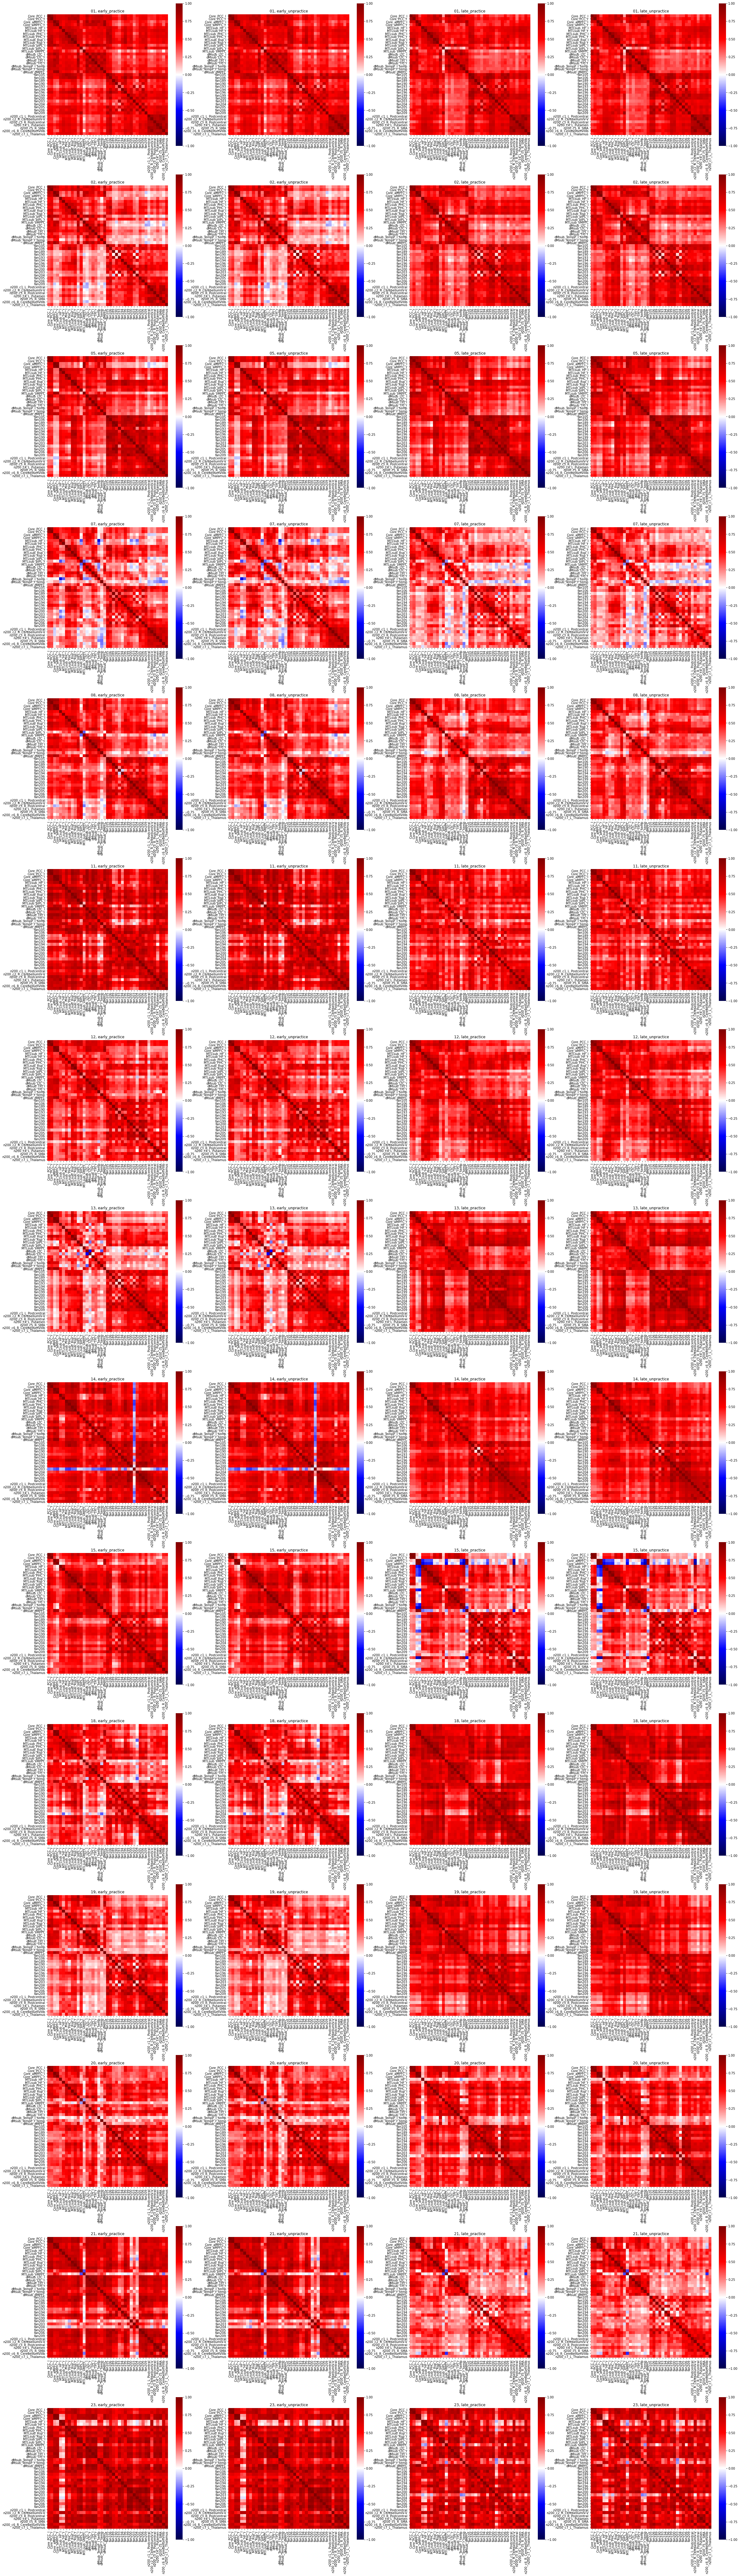

In [37]:
fig, axs = plt.subplots(nrows=len(subjs), ncols=len(stages), figsize=(len(stages)*10, len(subjs)*10))
if len(axs.shape)!=1:
    axs = np.concatenate(axs)

corrmats = {}
for i, (subj, stage) in enumerate(tqdm(list_)):
    corrmat = GA.make_df_correlation_matrix(subj, stage=stage, group=group)
    ## plot matrices by an individual subject
    ax = sns.heatmap(corrmat
                     , square=True, cmap='seismic', cbar=True
                     , robust=True
                     , vmin=-1., vmax=1.
                     , xticklabels=sorted_rois, yticklabels=sorted_rois, ax=axs[i])
    ax.set_title('%s, %s'%(subj, stage))
    if i<len(stages):
        corrmats[stage] = corrmat
    else:
        corrmats[stage] += corrmat        

In [15]:
# fig.savefig(fname=join(GA.dir_git,'GA/images/%s.individual_connectivity_matrices.MO.png'%GA.today))

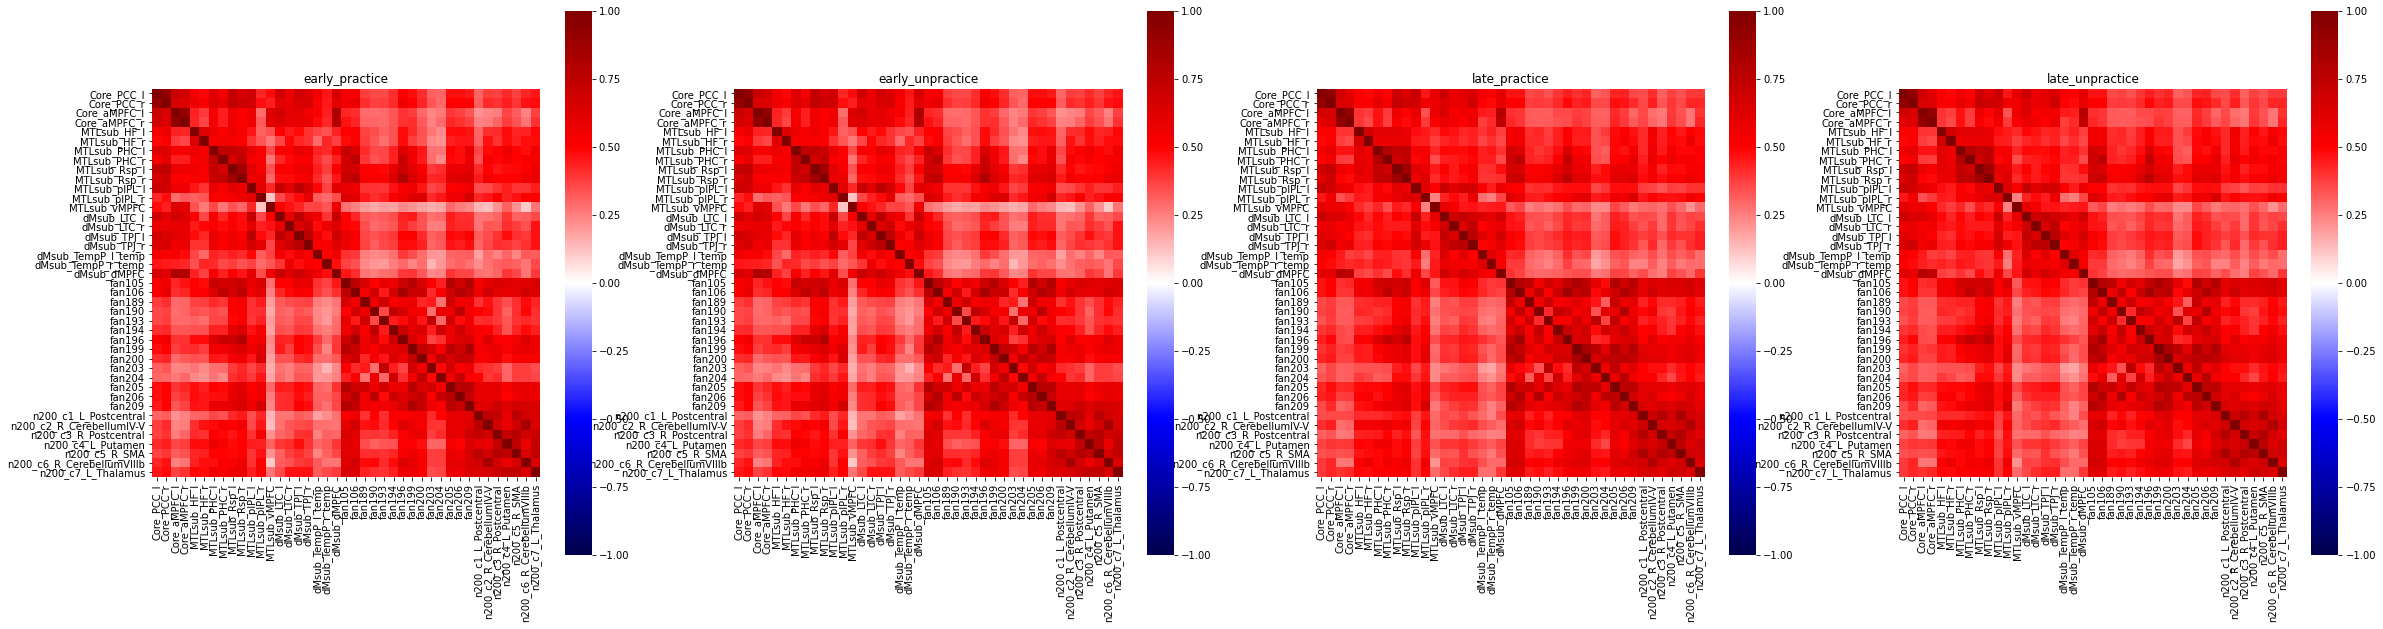

In [38]:
## divide by a number of subjects to obtain the average value
for stage in GA.list_stage:
    for roiA in sorted_rois:
        for roiB in sorted_rois:
            corrmats[stage].loc[roiA,roiB] /= len(subjs)

## plot group results
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(40, 10))
for i, stage in enumerate(GA.list_stage):
    ax = sns.heatmap(corrmats[stage]
                     , square=True, cmap='seismic', cbar=True
    #                  , robust=True
                     , vmin=-1., vmax=1.
                     , xticklabels=sorted_rois, yticklabels=sorted_rois, ax=axs[i])
    ax.set_title('%s'%stage)        

In [15]:
# fig.savefig(fname=join(GA.dir_git,'GA/images/%s.group_connectivity_matrices.MO.png'%GA.today))